<left><img width=25% src="img/gw_monogram_2c.png"></left>

# Lecture 14: Decision Tree

### CS6364/CS4364 Machine Learning
__Sardar Hamidian__<br>The George Washington Universiry

__Armin Mehrabian__<br>The George Washington Universiry

### Nice visualizations

http://www.r2d3.us/visual-intro-to-machine-learning-part-1/

# Part 1: Decision Trees

We are now going to see a different way of defining machine models called *decision trees*.

# Review: Components of A Supervised Machine Learning Problem

At a high level, a supervised machine learning problem has the following structure:

$$ \underbrace{\text{Training Dataset}}_\text{Attributes + Features} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Predictive Model} $$

# The UCI Diabetes Dataset

To explain what is a decision tree, we are going to use the UCI diabetes dataset that we have been working with earlier.

Let's start by loading this dataset.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
from sklearn import datasets

# Load the diabetes dataset
diabetes = datasets.load_diabetes(as_frame=True)
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

We can also look at the data directly.

In [2]:
# Load the diabetes dataset
diabetes_X, diabetes_y = diabetes.data, diabetes.target

# create a binary risk feature
diabetes_y_risk = diabetes_y.copy()
diabetes_y_risk[:] = 0
diabetes_y_risk[diabetes_y > 150] = 1

# Print part of the dataset
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


# Decision Trees: Intuition

Decision tress are machine learning models that mimic how a human would approach this problem.
1. We start by picking a feature (e.g., age)
2. Then we *branch* on the feature based on its value (e.g, age > 65?)
3. We select and branch on one or more features (e.g., is it a man?)
4. Then we return an output that depends on all the features we've seen (e.g., a man over 65)

# Decision Trees: Example

Let's first see an example on the diabetes dataset.

We will train a decision tree using its implementation in `sklearn`.

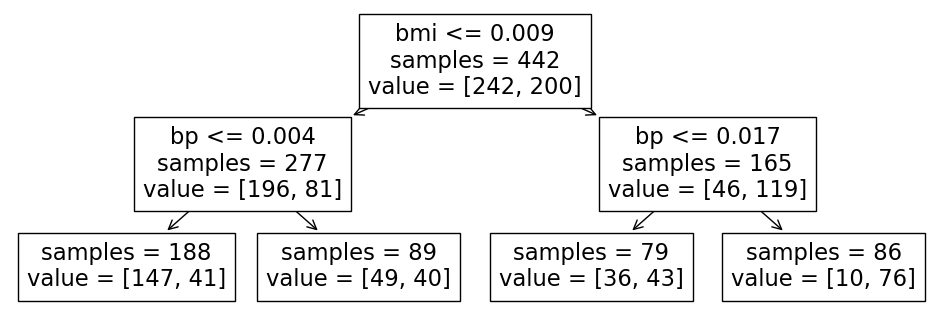

In [3]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# create and fit the model
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(diabetes_X.iloc[:,:4], diabetes_y_risk)

# visualize the model
# Convert the column index to a list
feature_names_list = diabetes_X.columns[:4].tolist()
plot_tree(clf, feature_names=feature_names_list, impurity=False)
plt.show()  # This will display the plot if not automatically shown


# Decision Rules

Let's now define a decision tree a bit more formally.
* A decision rule $r : \mathcal{X} \to \{\text{true}, \text{false}\}$ is a partition of the feature space into two disjoint regions, e.g.:
$$ r(x) = \begin{cases}\text{true} & \text{if } x_\text{bmi} \leq 0.009 \\ \text{false} & \text{if } x_\text{bmi} > 0.009 \end{cases} $$
* Normally, a rule applies to only one feature or attribute $x_j$ of $x$.
* If $x_j$ is continuous, the rule normally separates inputs $x_j$ into disjoint intervals $-\infty, c], (c, \infty)$.

# Decision Trees: Definition

A decision tree is a (usually binary) tree, where: 

* Each internal node $n$ corresponds to a rule $r_n$

* The $j$-th edge out of $n$ is associated with a rule value $v_j$, and we follow the $j$-th edge if $r_n(x)=v_j$

* Each leaf node $l$ contains a prediction $f(x)$

* Given input $x$, we start at the root, apply its rule, follow the eddge that corresponds to the outcome, and repeat recursively.

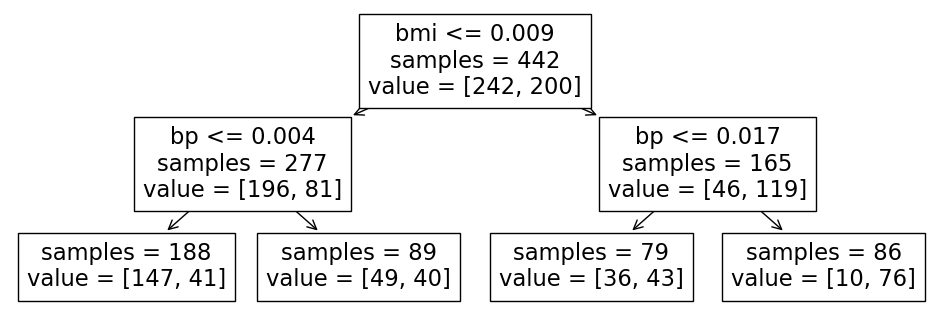

In [4]:
# visualize the model
# Correctly convert the feature names to a list
feature_names_list = diabetes_X.columns[:4].tolist()
plot_tree(clf, feature_names=feature_names_list, impurity=False)
plt.show()  # Ensure the plot is displayed


# Decision Regions

Decision trees partition the space of features into regions:
* A decision region $R\subseteq \mathcal{X}$ is a subset of the feature space defined by the application of a set of rules $r_1, r_2, \ldots, r_m$ and their values $v_1, v_2, \ldots, v_m \in \{\text{true}, \text{false}\}$, i.e.:
$$ R = \{x \in \mathcal{X} \mid r_1(x) = v_1 \text{ and } \ldots \text{ and } r_m(x) = v_m \} $$
* For example, a decision region in the diabetes problem is:
$$ R = \{x \in \mathcal{X} \mid x_\text{bmi} \leq 0.009 \text{ and } x_\text{bp} > 0.004 \} $$

We can illustrate decision regions via this figure from Hastie et al.

<center><img width=50% src="img/decision_tree.png"></center>

The illustrations are as follows:
* Top right: regions that can be represented by a tree
* Bottom left: tree generating the top right regions
* Bottom right: function values assigned to the regions
* Top left: regions that cannot be represented by a tree.

# Decision Trees and Regions

A decision tree can be written as a model $f : \mathcal{X} \to \mathcal{Y}$ of the form
$$ f(x) = \sum_{R \in \mathcal{R}} y_R \mathbb{I}\{x \in R\}. $$
* The $\mathbb{I}\{\cdot\}$ is an indicator function (one if $\{\cdot\}$ is true, else zero) and values $y_R \in \mathcal{Y}$ are the outputs for that region.
* The set $\mathcal{R}$ is a collection of decision regions. They are obtained by a recursive learning procedure (*recursive binary splitting*).
* The rules defining the regions $\mathcal{R}$ can be organized into a tree, with one rule per internal node and regions being the leaves.

# Pros and Cons of Decision Trees

Decision trees are important models in machine learning
* They are highly interpretable.
* Require little data preparation (no rescaling, handle continuous and discrete features).
* Easy to use with categorical data

Their main disadvantages are that:
* If they stay small and interpretable, they are not as powerful.
* If they are large, they easily overfit and are hard to regularize.

<left><img width=25% src="img/gw_monogram_2c.png"></left>
# Part 2: Learning Decision Trees

We saw how decision trees are represented. How do we now learn them from data?


# Recall: Decision Trees

A decision tree is a model $f : \mathcal{X} \to \mathcal{Y}$ of the form
$$ f(x) = \sum_{R \in \mathcal{R}} y_R \mathbb{I}\{x \in R\}. $$
* The $\mathbb{I}\{\cdot\}$ is an indicator function (one if $\{\cdot\}$ is true, else zero) and values $y_R \in \mathcal{Y}$ are the outputs for that region.
* The set $\mathcal{R}$ is a collection of decision regions. They are obtained by *recursive binary splitting*.
* The rules defining the regions $\mathcal{R}$ can be organized into a tree, with one rule per internal node and regions being the leaves.

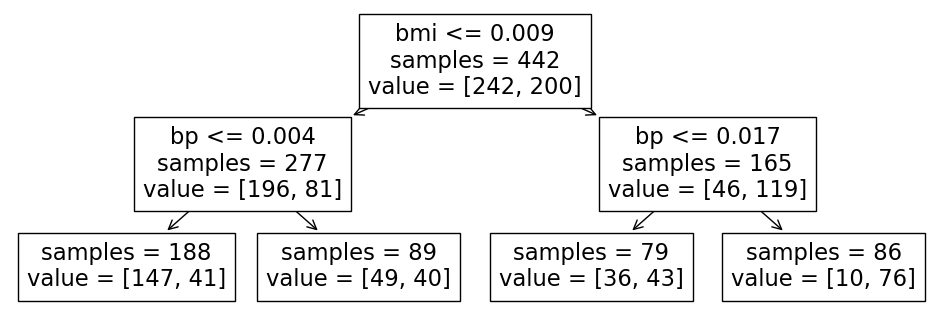

In [5]:
# Explicitly convert the feature names to a list
plot_tree(clf, feature_names=diabetes_X.columns[:4].tolist(), impurity=False)
plt.show()  # This command will display the plot

We can also illustrate decision trees via this figure from Hastie et al.

<left><img width=50% src="img/decision_tree.png"></left>

# Learning Decision Trees

At a high level, decision trees are grown by adding nodes one at a time.

```python
def build_tree():
    whlie tree.is_complete() is False:
        leaf, leaf_data = tree.get_leaf()
        new_rule = create_rule(leaf_data)
        tree.append_rule(leaf, new_rule)
```

Most often, we build the tree until it reaches a maximum number of nodes. The crux of the algorithm is in `create_rule`.

# Learning New Decision Rules

What is the set of possible rules that `create_rule` can add to the tree? 

When $x$ has continuous features, the rules have the following form:

$$ r(x) = \begin{cases}\text{true} & \text{if } x_j \leq t \\ \text{false} & \text{if } x_j > t \end{cases} $$

for a feature index $j$ and threshold $t \in \mathbb{R}$.

When $x$ has categorial features, rules may have the following form:
$$ r(x) = \begin{cases}\text{true} & \text{if } x_j = t_k \\ \text{false} & \text{if } x_j \neq t_k \end{cases} $$
for a feature index $j$ and possible value $t_k$ for $x_j$.

# Learning New Decision Rules

How does the `create_rule` function choose new rule $r$? Let's say that $R$ is the region of a leaf and $\mathcal{D}_R = \{(x^{(i)}, y^{(i)}\mid x^{(i)} \in R \}$ is the data for $R$.

We add to the leaf a new rule $r : \mathcal{X} \to \{T, F\}$ that minimizes a loss:
$$ \min_{r \in \mathcal{U}} \left( \underbrace{L(\{(x, y) \in \mathcal{D}_R \mid r(x) = \text{T}\})}_\text{left subtree} +  \underbrace{L(\{(x, y) \in \mathcal{D}_R \mid r(x) = \text{F}\}}_\text{right subtree})\right) $$

where $L$ is a loss function over a subset of the data flagged by the rule and $\mathcal{U}$ is the set of possible rules.

Which is the best split given the data with two classes?
<left><img width=50% src="img/dt-1.png"></left>

* The goodness of split is measured by an impurity function
* defined for each node
* Intuitively, we want each leaf node to be “pure”, that is, one class dominates.
<left><img width=50% src="img/dt-2.png"></left>

* How to determine the Best Split?

* Nodes with homogeneous class distribution are preferred


* Need a measure of node impurity. Imagine we have 10 data points and we make a split
    * C1 (5) - C2 (5) --> impure
    * C2 (9) - C2 (1) --> more pure

Simple Impurity measure
* Relative fraction of each class
* What's Problem with that?


Measures of Impurity:

1. Information Gain based on Entropy
2. Gini Index

# Information Gain in Decision Trees

Decision trees use various metrics to determine the best split at each node. One commonly used metric is *Information Gain*, which is based on the concept of Entropy.

## Entropy

Entropy measures the uncertainty or impurity in a group of examples. The entropy of a set $ S $ is calculated as:

$$
\text{Entropy}(S) = -\sum_{v \in V} p(v) \log(p(v))
$$

- $ V $ are the distinct values that the target attribute can take.
- $ p(v) $ is the proportion of the number of elements in class $ v $ to the number of elements in set $ S $.

## Information Gain

Information Gain is the decrease in entropy after a dataset is split on an attribute. It measures how well a given attribute separates the training examples according to their target classification. The Information Gain $ \text{Gain}(S, A) $ for an attribute $ A $ is defined as:

$$
\text{Gain}(S, A) = \text{Entropy}(S) - \sum_{v \in V} \left( \frac{|S_v|}{|S|} \right) \text{Entropy}(S_v)
$$

- $ S_v $ is the subset of $ S $ where attribute $ A $ has the value $ v $.
- $ |S_v| $ is the size of the subset $ S_v $.
- $ |S| $ is the size of the set $ S $.

### Calculation Process

To calculate the Information Gain of an attribute \( A \):

1. Calculate the entropy for the entire set \( S \).
2. For each value \( v \) that the attribute \( A \) can take:
   - Partition \( S \) into subsets \( S_v \).
   - Calculate the entropy of each subset \( S_v \).
   - Multiply the entropy of each subset by the proportion of the number of elements in \( S_v \) to the number of elements in \( S \).
3. Sum these values and subtract from the original entropy to determine the Information Gain for attribute \( A \).

The attribute with the highest Information Gain is used to make the split in the decision tree at the current node.


if F is a feature with two possible values 0 and 1, and p0=1 and p1=0, then we get no new information from knowing that F=+1 for a given example. Thus the entropy is zero. If p1=0.5 and p2=0.5, then the entropy is at maximum.!

<left><img width=50% src="img/dt-entropy.png"></left>

<left><img width=50% src="img/dt-entropy-2.png"></left>

# Entropy at a Given Node \( t \)

Entropy at a node in a decision tree is a measure of the randomness or disorder at that point. It reflects the homogeneity of the examples at the node.

## Entropy Equation

For a given node \( t \), the entropy can be defined as:

$$
\text{Entropy}(t) = -\sum_{j} p(j | t) \log p(j | t)
$$

- $ p(j | t) $ is the relative frequency of class \( j \) at node \( t \).

### Interpretation

- The **maximum entropy** is $ \log(n_c) $, where $ nc $ is the number of classes. This maximum value occurs when the records are evenly distributed among all classes, implying that there is the least amount of information gained from any split at this node.
- The **minimum entropy** is 0.0, which occurs when all records at node $ t $ belong to one class, implying that the node is perfectly homogeneous, and there is the most amount of information to be gained.
  

### Example of calculating Entropy

<left><img width=70% src="img/dt-sample-entropy.png"></left>


# Information Gain of a Split

Information Gain measures the change in entropy that results from splitting a dataset on an attribute. It is an essential metric in the construction of decision trees.

## Definition of Information Gain

When a parent node \( p \) is split into \( k \) partitions, with \( n_i \) representing the number of records in the \( i^{th} \) partition, the Information Gain (\( \text{Gain} \)) is calculated as the reduction in entropy brought about by the split. The formula is given by:

$$
\text{Gain}(p) = \text{Entropy}(p) - \sum_{i=1}^{k} \left( \frac{n_i}{N} \right) \text{Entropy}(i)
$$

- $ \text{Entropy}(p) $ represents the entropy of the parent node.
- $ \text{Entropy}(i) $ denotes the entropy of the $ i^{th} $ partition.
- $ N $ is the total number of records at the parent node.
- $ \frac{n_i}{N} $ is the proportion of records in the $ i^{th} $ partition relative to the total.

## Criteria for Split Selection

- The aim is to select the split that achieves the maximum Information Gain, thereby reducing uncertainty the most.
- Algorithms such as ID3 and C4.5 utilize Information Gain for this purpose in constructing decision trees.

### Points of Consideration

- A known disadvantage of Information Gain is its inclination towards splits that result in numerous partitions, each being small but highly homogeneous.
- Such a preference can lead to overfitting, where the model exhibits high accuracy on the training data but performs poorly on new, unseen data.


### Post Pruning
* Run over tree
* Prune each node by replacing subtree below with a leaf
* Evaluate error (on validation data) and keep if error same or better


### How does the algorithm generalize from the training examples?
* Choose features with highest information gain
* Minimize amount of information is left
* Bias towards shorter trees
* Put most useful features near root


### Other considerations
* Continuous attributes (Random threshold splits)
    * Age, weight, speed, …
* When do we stop?
    * Everything classified correctly
    * All attributes consumed?
    * What if we have noise in the data?

# Algorithm: Classification and Regression Trees (CART)

* __Type__: Supervised learning (regression and classification).
* __Model family__: Decision trees.
* __Objective function__: Squared error, mislcassification error, Gini index, etc.
* __Optimizer__: Greedy addition of rules, followed by pruning.

<left><img width=25% src="img/gw_monogram_2c.png"></left>
# Part 3: Bagging

Next, we are going to see a general technique to improve the performance of machine learning algorithms.

We will then apply it to decision trees to define an improved algorithm.

# Review: Overfitting

Overfitting is one of the most common failure modes of machine learning.
* A very expressive model (a high degree polynomial) fits the training dataset perfectly.
* The model also makes wildly incorrect prediction outside this dataset, and doesn't generalize.

Recall this example, in which we take random samples around a true function.

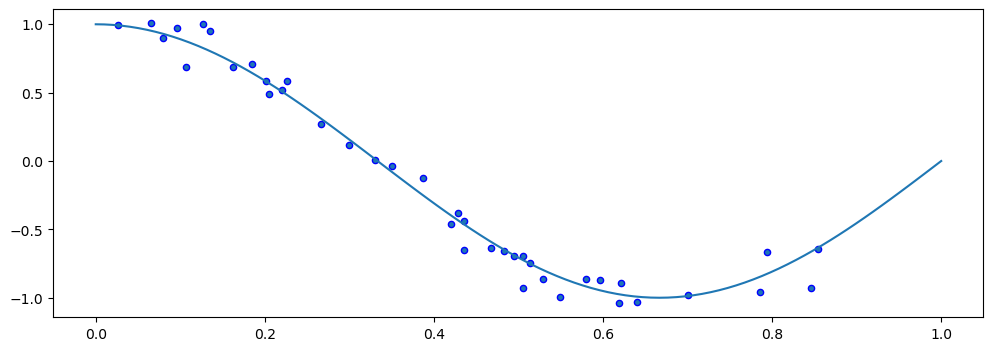

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def true_fn(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(2)
n_samples = 40
X = np.sort(np.random.rand(n_samples))
y = true_fn(X) + np.random.randn(n_samples) * 0.1

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, true_fn(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")

# Fitting High-Degree Polynomials

Let's see what happens if we fit a high degree polynomial to random samples of 20 points from this dataset.

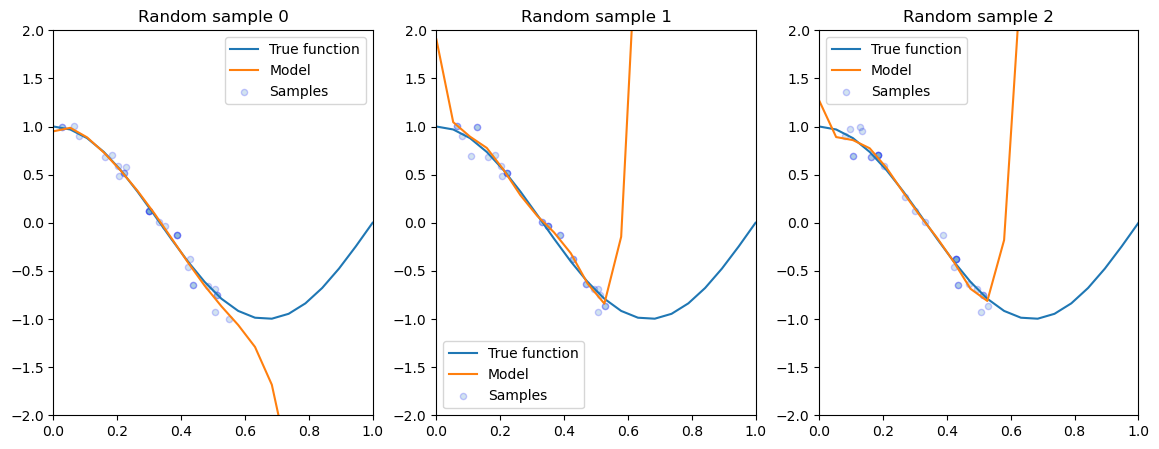

In [7]:
n_plots, X_line = 3, np.linspace(0,1,20)
plt.figure(figsize=(14, 5))
for i in range(n_plots):
    ax = plt.subplot(1, n_plots, i + 1)
    random_idx = np.random.randint(0, 30, size=(30,))
    X_random, y_random = X[random_idx], y[random_idx]

    polynomial_features = PolynomialFeatures(degree=6, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
    pipeline.fit(X_random[:, np.newaxis], y_random)

    ax.plot(X_line, true_fn(X_line), label="True function")    
    ax.plot(X_line, pipeline.predict(X_line[:, np.newaxis]), label="Model")
    ax.scatter(X_random, y_random, edgecolor='b', s=20, label="Samples", alpha=0.2)
    ax.set_xlim((0, 1))
    ax.set_ylim((-2, 2))
    ax.legend(loc="best")
    ax.set_title('Random sample %d' % i)

# High-Variance Models

Each small subset of the data that we train on results is a very different model.

An algorithm that has a tendency to overfit is also called *high-variance*, because it outputs a predictive model that varies a lot if we slightly perturb the dataset.

# Bagging: Bootstrap Aggregation

The idea of *bagging* is to reduce model variance by averaging many models trained on random subsets of the data.

```python
for i in range(n_models):
    # collect data samples and fit models
    X_i, y_i = sample_with_replacement(X, y, n_samples)
    model = Model().fit(X_i, y_i)
    ensemble.append(model)

# output average prediction at test time:
y_test = ensemble.average_prediction(x_test)
```
The data samples are taken with replacement and known as bootstrap samples.

# Bagged Polynomial Regression

Let's apply bagging to our polynomial regression problem.

We are going to train a large number of polynomial regressions on random subsets of the dataset of points that we created earlier.

We start by training an ensemble of bagged models.

In [8]:
n_models, n_subset = 10000, 30
ensemble, Xs, ys = [], [], []
for i in range(n_models):
    # take a random subset of the data
    random_idx = np.random.randint(0, 30, size=(n_subset,))
    X_random, y_random = X[random_idx], y[random_idx]

    # train a polynomial regression model
    polynomial_features = PolynomialFeatures(degree=6, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
    pipeline.fit(X_random[:, np.newaxis], y_random)

    # add it to our set of bagged models
    ensemble += [pipeline]
    Xs += [X_random]
    ys += [y_random]

Let's visualize the prediction of the bagged model on each random dataset sample and compare to predictions from an un-bagged models.

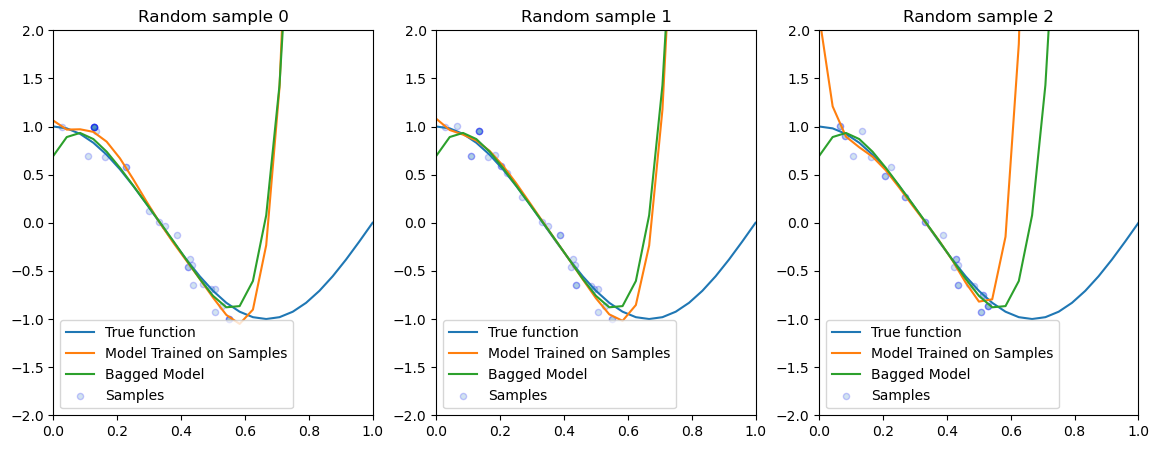

In [9]:
n_plots, X_line = 3, np.linspace(0,1,25)
plt.figure(figsize=(14, 5))
for i in range(n_plots):
    ax = plt.subplot(1, n_plots, i + 1)

    # generate average predictions
    y_lines = np.zeros((25, n_models))
    for j, model in enumerate(ensemble):
        y_lines[:, j] = model.predict(X_line[:, np.newaxis])
    y_line = y_lines.mean(axis=1)

    # visualize them
    ax.plot(X_line, true_fn(X_line), label="True function")    
    ax.plot(X_line, y_lines[:,i], label="Model Trained on Samples")
    ax.plot(X_line, y_line, label="Bagged Model")
    ax.scatter(Xs[i], ys[i], edgecolor='b', s=20, label="Samples", alpha=0.2)
    ax.set_xlim((0, 1))
    ax.set_ylim((-2, 2))
    ax.legend(loc="best")
    ax.set_title('Random sample %d' % i)

# Extensions of Bagging

There exist a few closely related techniques to bagging.
* Pasting is when samples are taken without replacement.
* Random features are when we randomly sample the features.
* Random patching is when we do both of the above.

# Summary: Bagging

Bagging is a general technique that can be used with high-variance ML algorithms.

It averages predictions from multiple models trained on random subset of the data.

<left><img width=25% src="img/gw_monogram_2c.png"></left>
# Part 4: Random Forests

Next, let's see how bagging can be applied to decision trees. This will also provide us with a new algorithm.


# Review: Bagging

The idea of *bagging* is to reduce model variance by averaging many models trained on random subsets of the data.

```python
for i in range(n_models):
    # collect data samples and fit models
    X_i, y_i = sample_with_replacement(X, y, n_samples)
    model = Model().fit(X_i, y_i)
    ensemble.append(model)

# output average prediction at test time:
y_test = ensemble.average_prediction(y_test)
```
The data samples are taken with replacement and known as bootstrap samples.

# Review: Decision Trees

A decision tree is a model $f : \mathcal{X} \to \mathcal{Y}$ of the form
$$ f(x) = \sum_{R \in \mathcal{R}} y_R \mathbb{I}\{x \in R\}. $$
* The $\mathbb{I}\{\cdot\}$ is an indicator function (one if $\{\cdot\}$ is true, else zero) and values $y_R \in \mathcal{Y}$ are the outputs for that region.
* The set $\mathcal{R}$ is a collection of decision regions. They are obtained by *recursive binary splitting*.
* The rules defining the regions $\mathcal{R}$ can be organized into a tree, with one rule per internal node and regions being the leaves.

We can also illustrate decision trees via this figure from Hastie et al.

<left><img width=50% src="img/decision_tree.png"></left>

# Classification Dataset: Iris Flowers

Let's now look at the performance of decision trees on a new dataset, Iris flowers.

It's a classical dataset originally published by [R. A. Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in 1936. Nowadays, it's widely used for demonstrating machine learning algorithms.

In [10]:
import numpy as np
import pandas as pd
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris(as_frame=True)

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
# print part of the dataset
iris_X, iris_y = iris.data, iris.target
pd.concat([iris_X, iris_y], axis=1).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


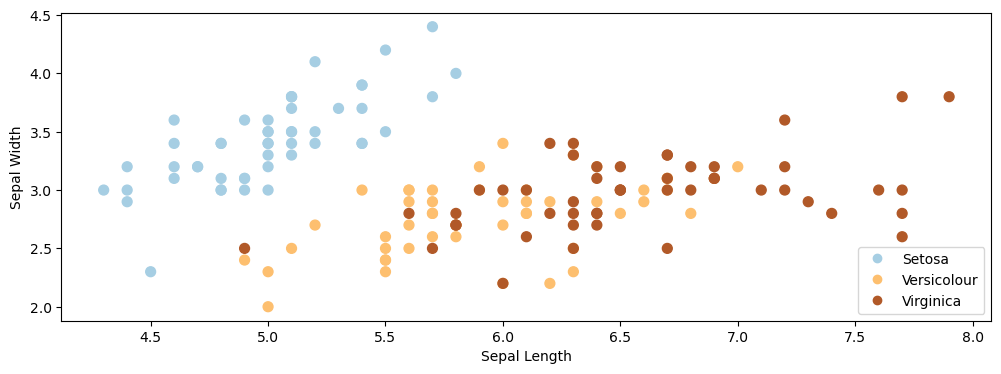

In [12]:
# Plot also the training points
p1 = plt.scatter(iris_X.iloc[:, 0], iris_X.iloc[:, 1], c=iris_y, s=50, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Versicolour', 'Virginica', 'Query'], loc='lower right')

# Decision Trees on the Flower Dataset

Let's now consider what happens when we train a decision tree on the Iris flower dataset.

The code below will be used to visualize predictions from decision trees on this dataset.

In [13]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

def make_grid(X):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.iloc[:, 0].min() - 0.1, X.iloc[:, 0].max() + 0.1
    y_min, y_max = X.iloc[:, 1].min() - 0.1, X.iloc[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    return xx, yy, x_min, x_max, y_min, y_max

def make_2d_preds(clf, X):
    xx, yy, x_min, x_max, y_min, y_max = make_grid(X)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return Z

def make_2d_plot(ax, Z, X, y):
    # Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

    xx, yy, x_min, x_max, y_min, y_max = make_grid(X)

    # Put the result into a color plot
    ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k', s=50)
    ax.set_xlabel('Sepal Length')
    ax.set_ylabel('Sepal Width')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())    

We may now train and visualize a decision tree on this dataset.

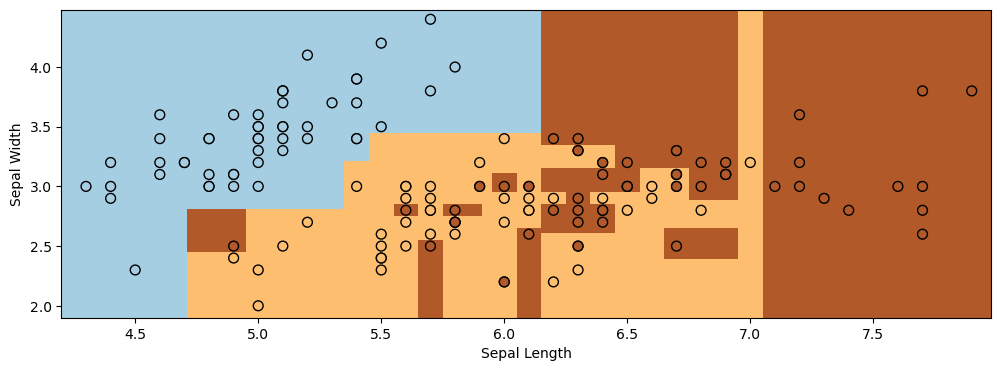

In [14]:
# Train a Decision Tree Model
ax = plt.gca()
X = iris_X.iloc[:,:2]
clf = DecisionTreeClassifier()
clf.fit(X, iris_y)
Z = make_2d_preds(clf, X)
make_2d_plot(ax, Z, X, iris_y)

# Two Problems With Decision Trees

We see two problems with the output of the decision tree on the Iris dataset:
* The decision boundary between the two classes is very non-smooth and blocky.
* The decision tree overfits the data and the decision regions are highly fragmented.

# High-Variance Decision Trees

When the trees have sufficiently high depth, they can quickly overfit the data.

Recall that this is called the *high variance* problem, because small perturbations of the data lead to large changes in model predictions.

Consider the perofmrance of a decision tree classifier on 3 random subsets of the data.

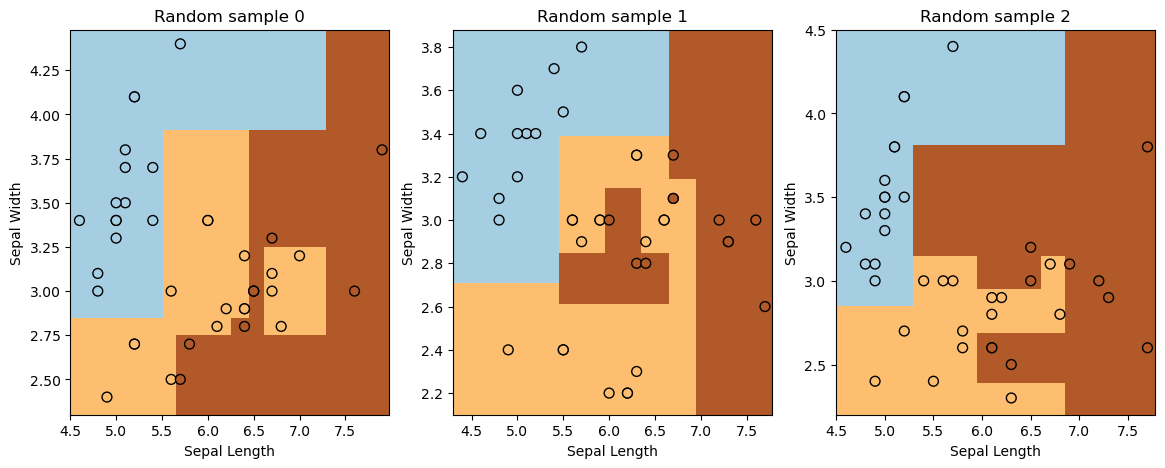

In [15]:
n_plots, n_flowers, n_samples = 3, iris_X.shape[0], 40
plt.figure(figsize=(14, 5))
for i in range(n_plots):
    ax = plt.subplot(1, n_plots, i + 1)
    random_idx = np.random.randint(0, n_flowers, size=(n_samples,))
    X_random, y_random = iris_X.iloc[random_idx, :2], iris_y[random_idx]

    clf = DecisionTreeClassifier()
    clf.fit(X_random, y_random)
    Z = make_2d_preds(clf, X_random)
    make_2d_plot(ax, Z, X_random, y_random)
    ax.set_title('Random sample %d' % i)

# Random Forests

In order to reduce the variance of the basic decision tree, we apply bagging -- the variance reduction technique that we have seen earlier.

We refer to bagged decision trees as *Random Forests*.

Instantiating our definition of bagging with decision trees, we obtain the following pseudocode defintion of random forests:

```python
for i in range(n_models):
    # collect data samples and fit models
    X_i, y_i = sample_with_replacement(X, y, n_samples)
    model = DecisionTree().fit(X_i, y_i)
    random_forest.append(model)

# output average prediction at test time:
y_test = random_forest.average_prediction(y_test)
```

We may implement random forests in python as follows:

In [16]:
np.random.seed(1000)
n_models, n_flowers, n_subset = 300, iris_X.shape[0], 10
random_forest = []
for i in range(n_models):
    # sample the data with replacement
    random_idx = np.random.randint(0, n_flowers, size=(n_subset,))
    X_random, y_random = iris_X.iloc[random_idx, :2], iris_y[random_idx]

    # train a decision tree model
    clf = DecisionTreeClassifier()
    clf.fit(X_random, y_random)

    # append it to our ensemble
    random_forest += [clf]

# Random Forests on the Flower Dataset

Consider now what happens when we deploy random forests on the same dataset as before.

Now, each prediction is the average on the set of bagged decision trees.

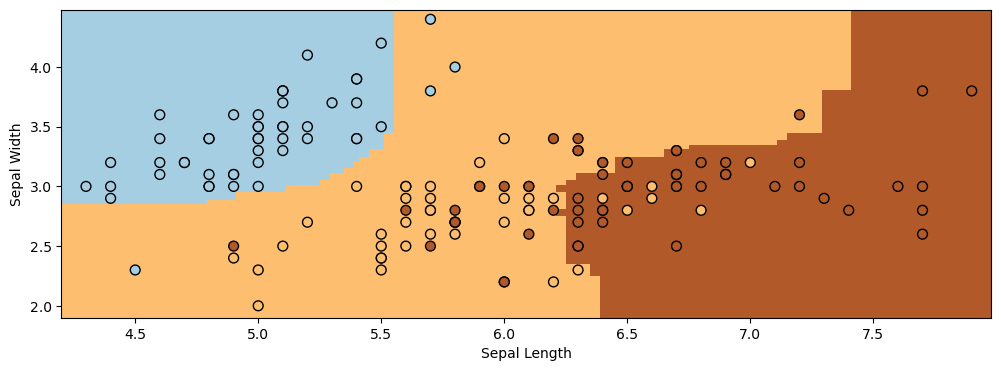

In [17]:
# Visualize predictions from a random forest
ax = plt.gca()

# compute average predictions from all the models in the ensemble
X_all, y_all = iris_X.iloc[:,:2], iris_y
Z_list = []
for clf in random_forest:
    Z_clf = make_2d_preds(clf, X_all)
    Z_list += [Z_clf]
Z_avg = np.stack(Z_list, axis=2).mean(axis=2)

# visualize predictions
make_2d_plot(ax, np.rint(Z_avg), X_all, y_all)

The boundaries are much more smooth and well-behaved.

# Algorithm: Random Forests

* __Type__: Supervised learning (regression and classification).
* __Model family__: Bagged decision trees.
* __Objective function__: Squared error, mislcassification error, Gini index, etc.
* __Optimizer__: Greedy addition of rules, followed by pruning.

# Pros and Cons of Random Forests

Random forests remain a popular machine learning algorithm:
* They require little data preparation (no rescaling, handle continuous and discrete features, work well for classification and regression).
* They are often quite accurate.

Their main disadvantages are that:
* They are not interpretable.
* They do not work with unstructured data (images, audio).